In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cmapy

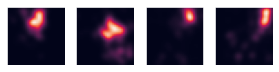

In [10]:
# def gzread(filename: str, threshold: int = -1) -> np.array:
#     '''Read gaze file, which is a three channel 8bit image'''
#     raw_gaze = cv.imread(filename)[:,:,0]
#     if threshold == -1:
#         threshold = np.percentile(raw_gaze,75)
#     return (raw_gaze>threshold).astype(np.uint8)

def gzread(filename: str, threshold: int = -1) -> np.array:
    '''Read gaze file, which is a three channel 8bit image'''
    return cv.resize(cv.imread(filename)[:,:,0],(32,32))
    # return cv.resize(cv.imread(filename),(32,32))

for i in range(1,5):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(gzread(f'{i}.jpg',threshold=40))
plt.show()

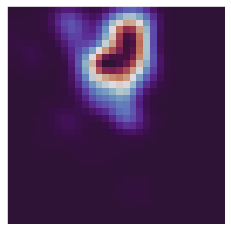

In [23]:
fig=plt.figure()
ax = fig.gca()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
gaze_heat=gzread(f'1.jpg')
plt.imshow(gaze_heat,cmap='twilight_shifted')
plt.show()

In [27]:
print(gaze_heat)

[[0 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
mask=gaze_heat
x_avg,y_avg,res=central_moment(gaze_heat, 0, 0)

In [45]:
x_avg

7.445410292072323

In [46]:
y_avg

15.340751043115437

In [67]:
def image2points(img:np.ndarray):
    '''Input a binary mask and output a set of points'''
    X = []
    Y = []
    W, H = img.shape
    for i in range(W):
        for j in range(H):
            if img[i,j] > 0:
                X.append(i)
                Y.append(j)
    return np.array(X), np.array(Y)

def visualization_image2points(img:np.ndarray):

    fig = plt.figure()
    plt.axis('off')
    # axs[0].imshow(img)

    # W,H = img.shape
    # X,Y = image2points(img)
    # axs[1].set_ylim((0,W))
    # axs[1].set_xlim((0,H))
    # axs[1].set_aspect('equal', 'box')
    # axs[1].plot(X,Y,'.')
    axs=fig.gca()
    H,W = img.shape
    X,Y = image2points(img)
    ax.grid(False)
    axs.set_ylim((0,H))
    axs.set_xlim((0,W))
    axs.set_aspect('equal', 'box')
    axs.plot(Y,W-X,'.')
    axs.plot(15,32-7,'r.')
    ax.grid(False)


    plt.show()


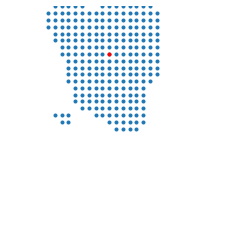

In [68]:
visualization_image2points(np.multiply(gaze_heat,gaze_heat>10))

In [61]:
def image2points(img:np.ndarray):
    '''Input a binary mask and output a set of points'''
    X = []
    Y = []
    W, H = img.shape
    for i in range(W):
        for j in range(H):
            if img[i,j] > 0:
                X.append(i)
                Y.append(j)
    return np.array(X), np.array(Y)

def visualization_image2points(img:np.ndarray):

    fig = plt.figure()
    # axs[0].imshow(img)

    # W,H = img.shape
    # X,Y = image2points(img)
    # axs[1].set_ylim((0,W))
    # axs[1].set_xlim((0,H))
    # axs[1].set_aspect('equal', 'box')
    # axs[1].plot(X,Y,'.')
    axs=fig.gca()
    H,W = img.shape
    X,Y = image2points(img)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    axs.set_ylim((0,H))
    axs.set_xlim((0,W))
    axs.set_aspect('equal', 'box')
    axs.plot(Y,W-X,'.')
    axs.plot(15,32-7,'r.')


    plt.show()


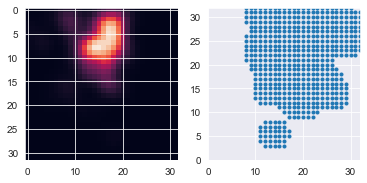

In [8]:
r_heatmap=cv.resize(gaze_heat,(9,8))
# plt.show()
fig = plt.figure()
ax = fig.gca()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(r_heatmap, cmap='magma')

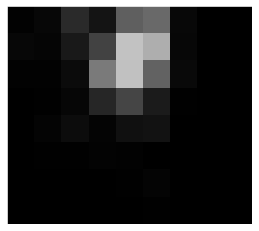

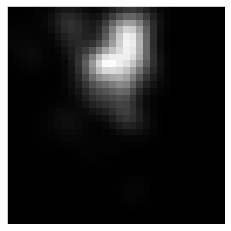

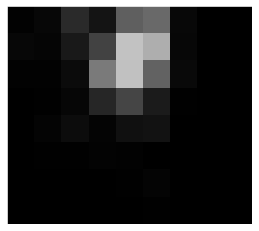

In [9]:
plt.show()

In [18]:
def dHash(image):
    image_new=image
    h,w=image.shape
    #计算均值
    avreage = np.mean(image_new)
    hash=[]
    h1=np.zeros([1,h*(w-1)])
    #每行前一个像素大于后一个像素为1，相反为0，生成哈希
    iter=0
    for i in range(h):
        for j in range(w-1):
            if image[i,j]>image[i,j+1]:
                h1[0][iter]=1
            #     hash.append(1)
            # else:
            #     hash.append(0)
            iter+=1
    return h1

In [20]:
dcode=dHash(r_heatmap)

In [22]:
dcode=dcode.reshape(8,8)

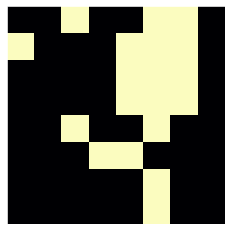

In [23]:
fig = plt.figure()
ax = fig.gca()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(dcode, cmap='magma')

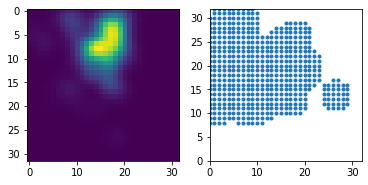

In [11]:
mask = cv.imread("1.jpg")[:,:,0]
mask = cv.resize(mask, (32,32))
# mask.shape
# mask = mask>40
visualization_image2points(mask)

In [41]:
def moment(img: np.ndarray, i: int, j: int) -> float:
    '''calculate the raw moment M_ij for an image
    https://en.wikipedia.org/wiki/Image_moment
    Wang Sheng @ 2022_11_04'''
    result = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result += (x**i)*(y**j) * img[x, y]
    return result


In [42]:
def central_moment(img: np.ndarray, i: int, j: int) -> float:
    '''calculate the central moment M_ij for an image'''
    M_00 = moment(mask, 0, 0)
    M_01 = moment(mask, 0, 1)
    M_10 = moment(mask, 1, 0)
    X_avg, Y_avg = (M_10/M_00), (M_01/M_00)
    result = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x, y]:
                result += ((x-X_avg)**i) * ((y-Y_avg)**j) * img[x, y]
    return X_avg,Y_avg,result


In [14]:
mu = central_moment
M = moment

In [15]:
mu(mask,0,0)

20132.0

In [16]:
mu(mask,2,0)

375127.0059109873

In [17]:
mu(mask,0,2)

261340.4478442283

In [128]:
def I_1(img):
    return mu(img, 2, 0)+mu(img, 0, 2)


In [129]:
print(I_1(mask))
mask = cv.rotate(mask.astype(np.uint8),cv.ROTATE_90_CLOCKWISE)
print(I_1(mask))

644065.7396955622
644065.7396955617


In [130]:
def G_moment(img):
    mu_00 = mu(img, 0, 0)
    return mu_00, I_1(img)/(mu_00**2)


In [134]:
gzlist = [gzread(f"{i}.jpg") for i in range(1,5)]
results = [G_moment(gz) for gz in gzlist]

In [135]:
results

[(20234.0, 0.00797574638541957),
 (29779.0, 0.002319066683753023),
 (12802.0, 0.0107006349622931),
 (18207.0, 0.007056082432956898)]

In [1]:
from gaze_moment import *

In [3]:
[Hu_moment.I_1(gzread(f'{i}.jpg')) for i in range(1,5)]

[31.830865854282997, 57.59986203525084, 68.78934564419941, 90.32599439878476]